WINE CLASSIFIER


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

wine=pd.read_csv(r"X:\ML Class\w3\winequality-white.csv",sep=';')

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null value in this dataset

In [6]:
# # Step 1: Transform the "quality" column into a binary format
# wine['wine_bin'] = wine['quality'].apply(lambda x: 'high-quality' if x >= 7 else 'low-quality')

DATA VISUALISATION

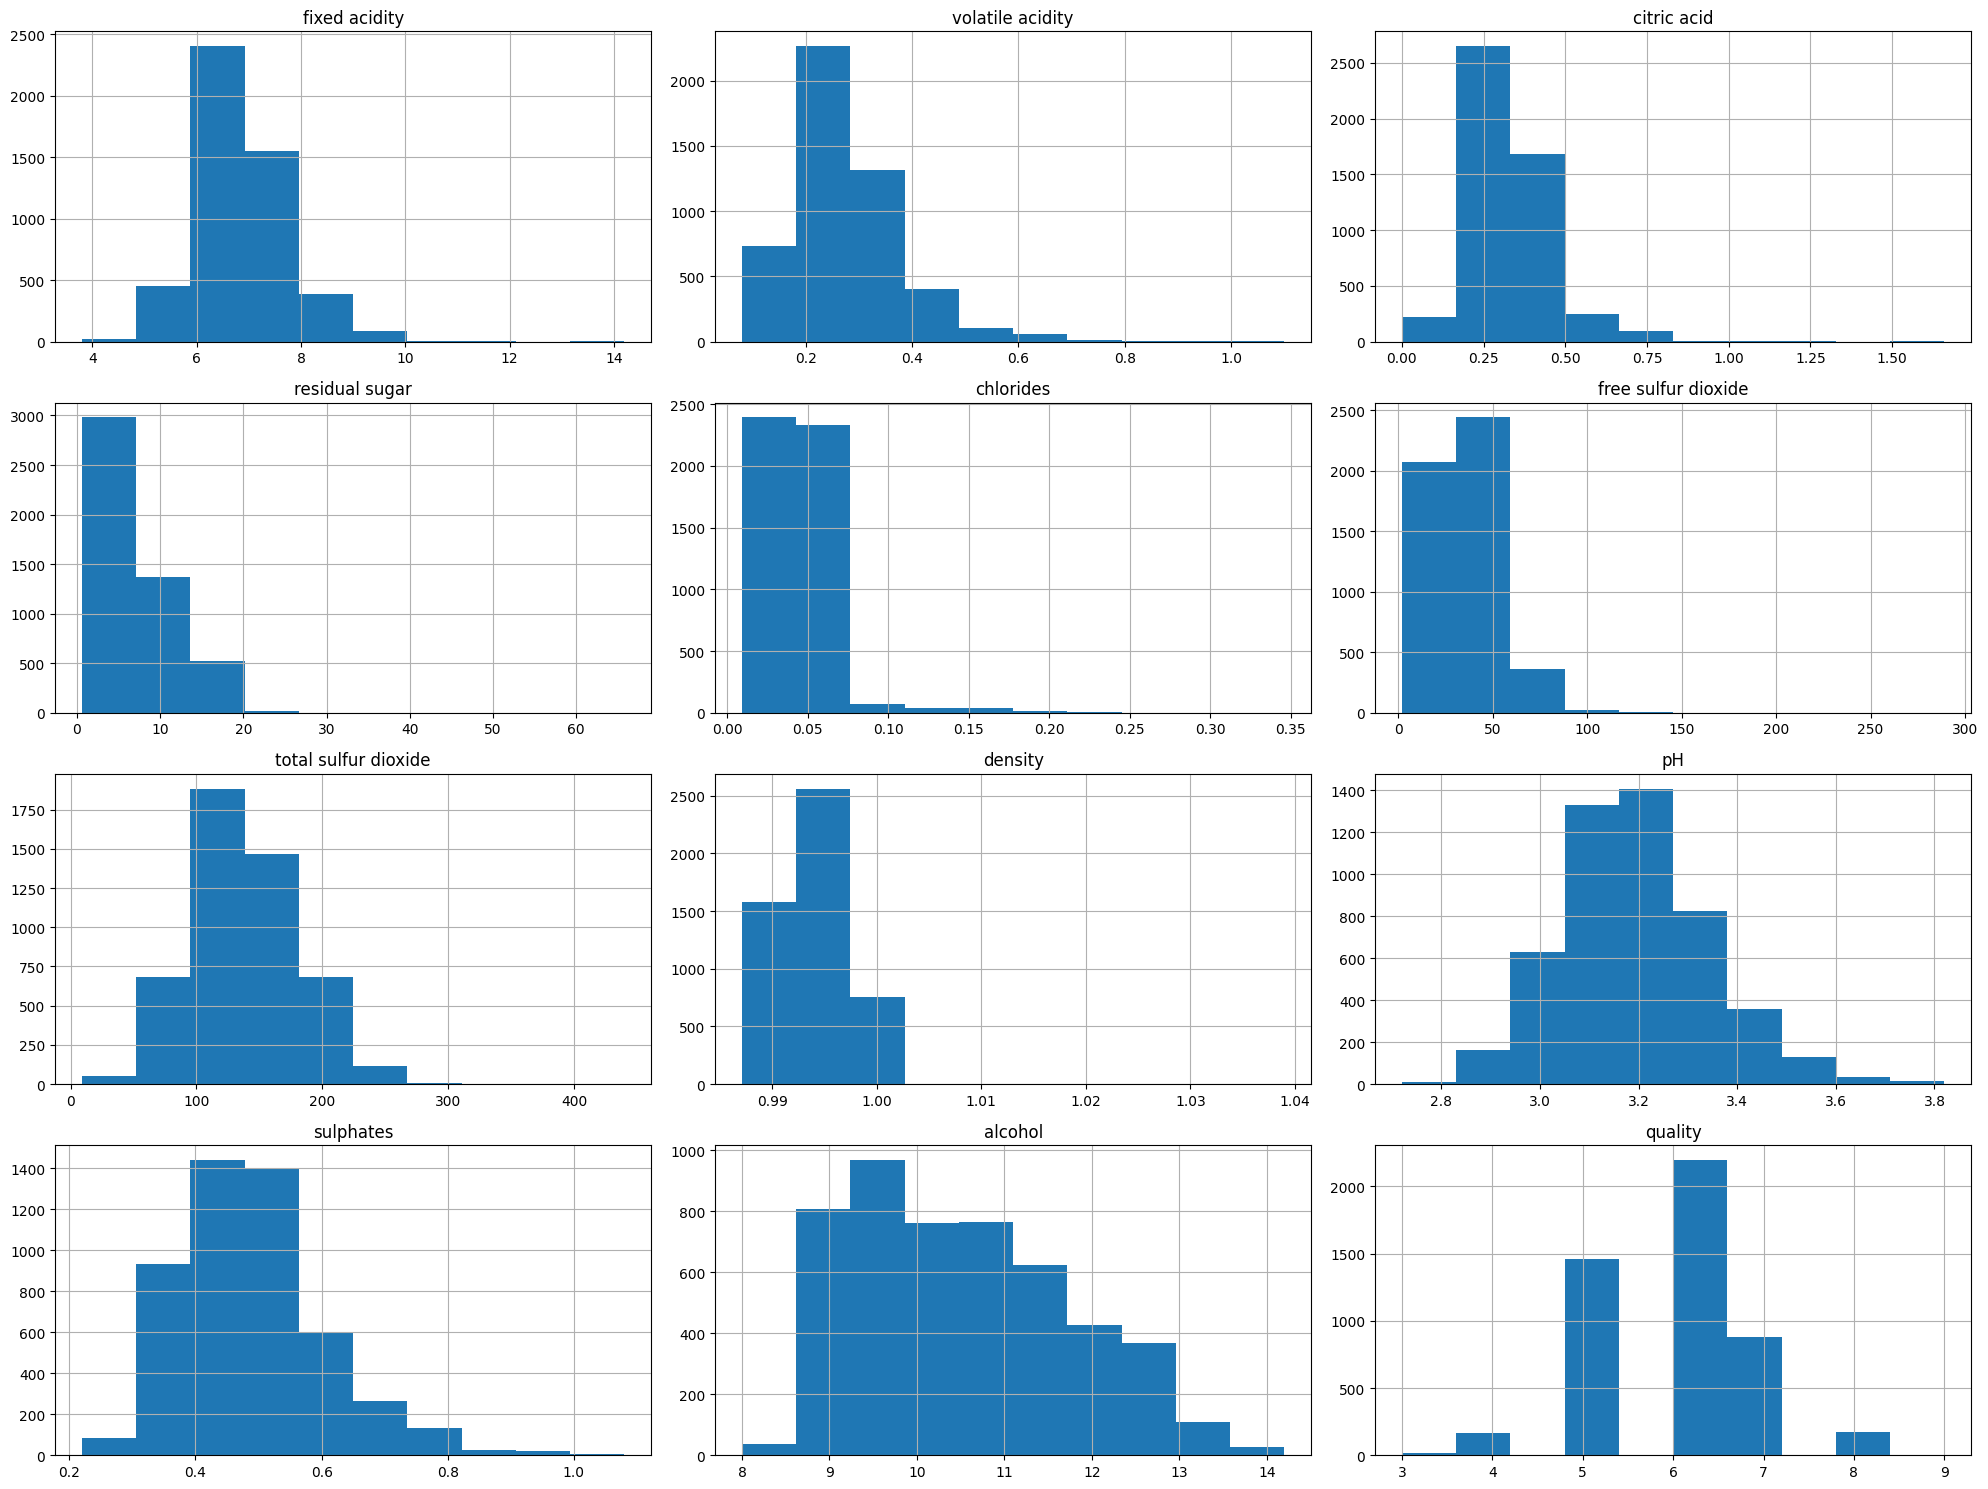

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram for all columns
wine.hist(bins=10, figsize=(20,15))
plt.tight_layout()  # This will provide better spacing between subplots
plt.show()

Note: Residual sugar, chloride, free sulfur dioxide and alcohol are skewed to the left

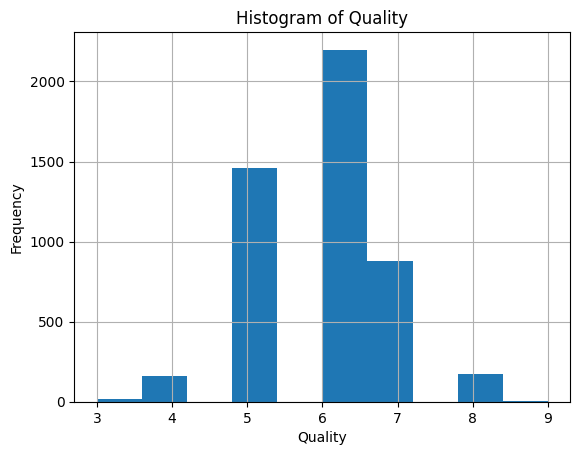

In [8]:
import matplotlib.pyplot as plt

# Plot a histogram for the "quality" column
wine['quality'].hist(bins=10)
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Note: quality at 6 has the highest count

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = wine.drop('quality', axis=1)
y = wine['quality']

# Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
y_train_high = (y_train >= 7) 
y_test_high = (y_test >= 7)

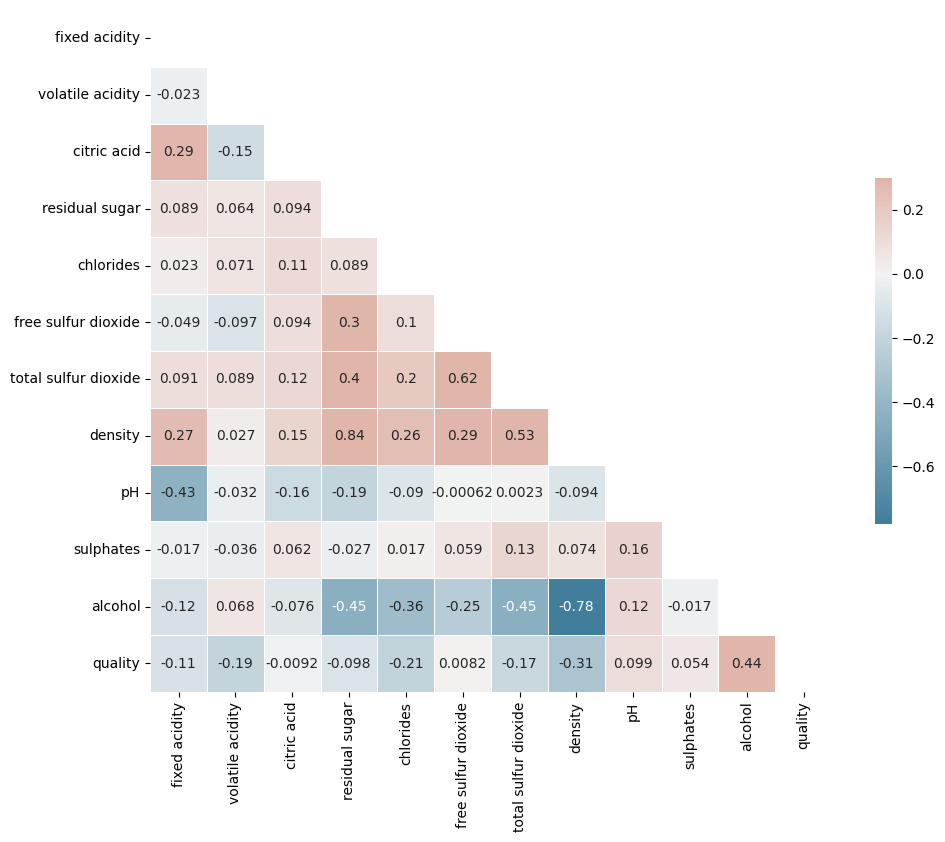

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

alcohol has highest correlation with quality, 2nd is density, third is chloride and fourth is volatile acidity

BUILDING A PIPELINE

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, validate=False),
        StandardScaler())

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())

def divide_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_divide, validate=False),
        StandardScaler())

def alkaline_reserve_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(calculate_alkaline_reserve, validate=False),
        StandardScaler())

def column_divide(X):
    return X[:, [0]] / X[:, [1]]
# Define the subtract pipeline
def subtract_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_subtract, validate=False),
        StandardScaler())

# Define the column subtract function for alkaline reserve calculation
def column_subtract(X):
    fixed_acidity = X[:, [0]]  # Assuming "fixed acidity" is the first column
    volatile_acidity = X[:, [1]]  # Assuming "volatile acidity" is the second column
    ph = X[:, [2]]  # Assuming "pH" is the third column
    alkaline_reserve = ph - (fixed_acidity + volatile_acidity)
    return alkaline_reserve

# Define the preprocessing pipeline
preprocessing = ColumnTransformer([
    ("log", log_pipeline(), ["alcohol", "density", "chlorides"]),
    ("divide", divide_pipeline(), ["alcohol", "density"]),
    ("alkaline_reserve", subtract_pipeline(), ["fixed acidity", "volatile acidity", "pH"])
], remainder=default_num_pipeline())
wine_prepared = preprocessing.fit_transform(wine)
wine_prepared.shape

(4898, 11)

EVALUATION OF MODEL PERFORMANCE ON TRAINING SET

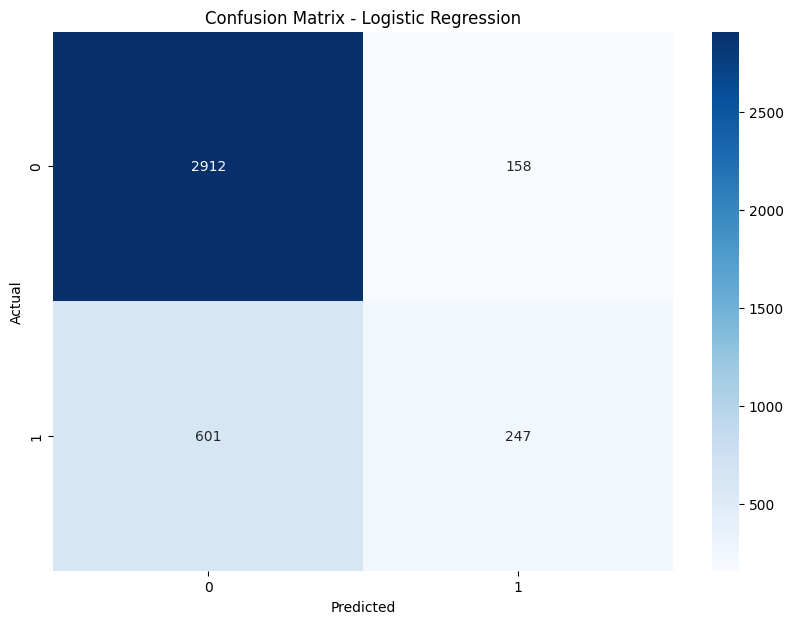


Logistic Regression Evaluation Metrics on Training Set:
Accuracy: 0.81
Precision: 0.78
Recall: 0.81
F1-score: 0.78


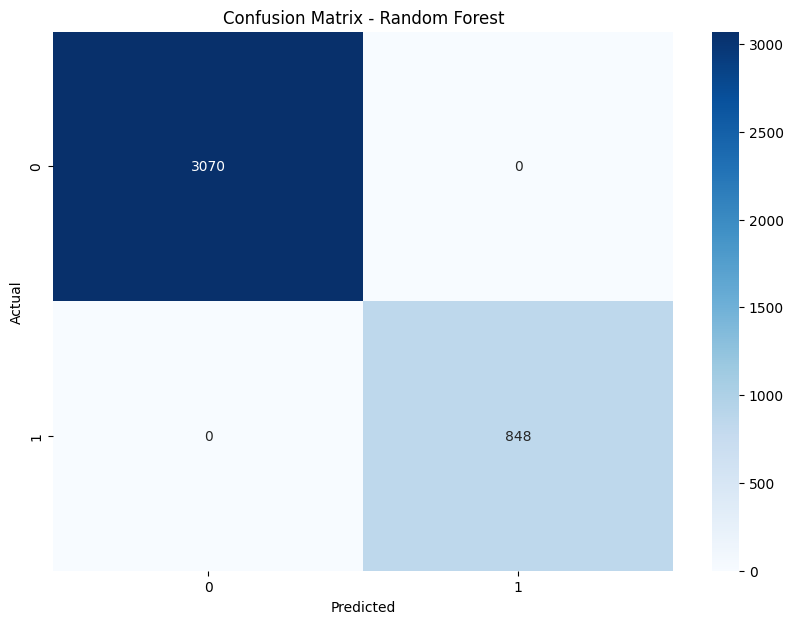


Random Forest Evaluation Metrics on Training Set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


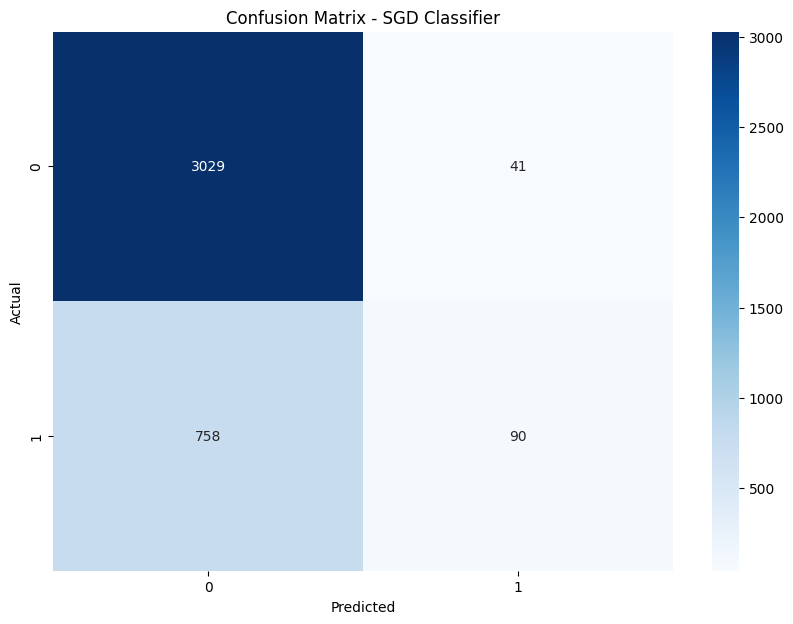


SGD Classifier Evaluation Metrics on Training Set:
Accuracy: 0.80
Precision: 0.78
Recall: 0.80
F1-score: 0.73


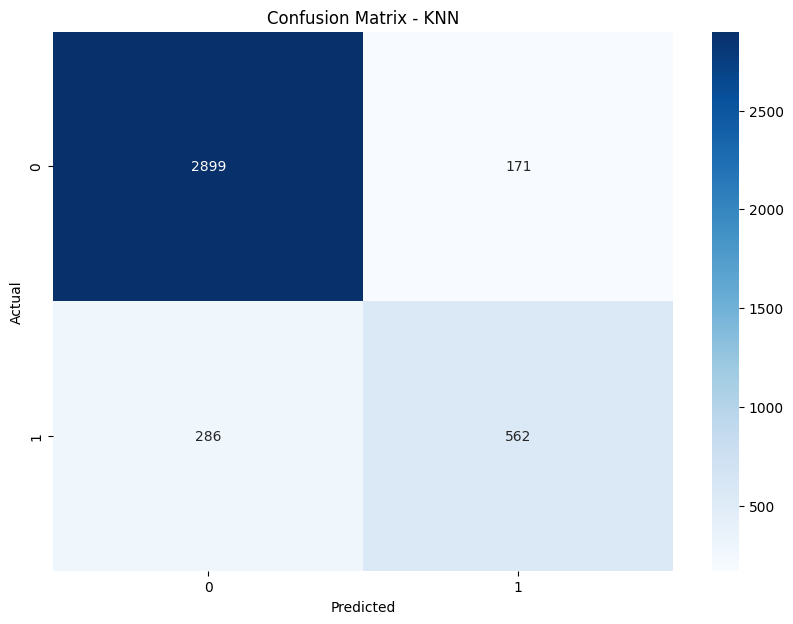


KNN Evaluation Metrics on Training Set:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-score: 0.88
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.806279   0.781512  0.806279  0.778552
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2       SGD Classifier  0.796069   0.775423  0.796069  0.732054
3                  KNN  0.883359   0.879147  0.883359  0.880189


In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define your models here
models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Fit and transform the training data with the preprocessing pipeline
X_train_prepared = preprocessing.fit_transform(X_train)

# Evaluate each model
for name, model in models_binary.items():
    # Fit the model
    model.fit(X_train_prepared, y_train_high)
    
    # Predict the target values
    y_pred_train = model.predict(X_train_prepared)
    
    # Calculate evaluation metrics on training set
    acc_train = accuracy_score(y_train_high, y_pred_train)
    precision_train = precision_score(y_train_high, y_pred_train, average='weighted', zero_division=0)
    recall_train = recall_score(y_train_high, y_pred_train, average='weighted', zero_division=0)
    f1_train = f1_score(y_train_high, y_pred_train, average='weighted', zero_division=0)
    
    # Compute confusion matrix
    cm_train = confusion_matrix(y_train_high, y_pred_train)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append metrics to lists
    model_names.append(name)
    accuracies.append(acc_train)
    precisions.append(precision_train)
    recalls.append(recall_train)
    f1_scores.append(f1_train)
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics on Training Set:")
    print(f"Accuracy: {acc_train:.2f}")
    print(f"Precision: {precision_train:.2f}")
    print(f"Recall: {recall_train:.2f}")
    print(f"F1-score: {f1_train:.2f}")

# Create a DataFrame to store the evaluation metrics
metrics_df_train = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Display the DataFrame
print(metrics_df_train)


EVALUATION OF MODEL PERFORMANCE ON TEST SET

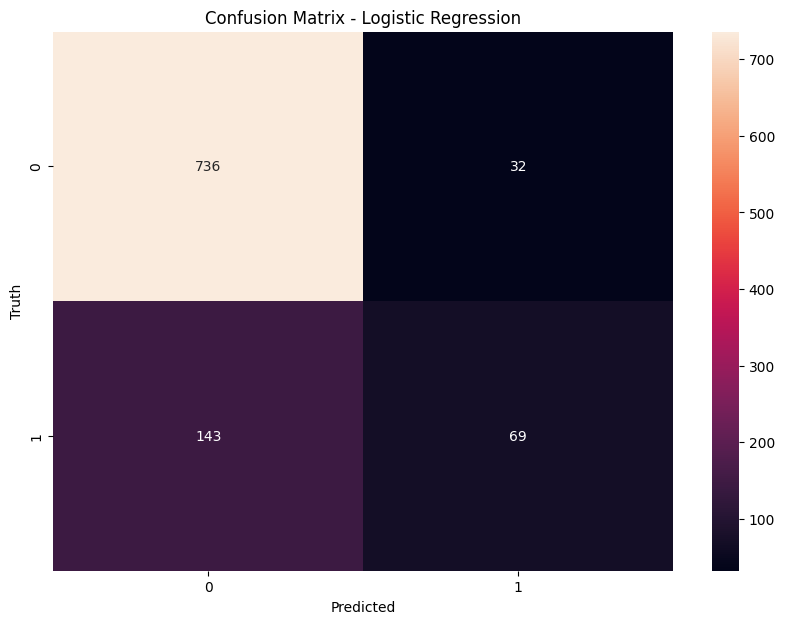


Logistic Regression Evaluation Metrics:
Accuracy: 0.82
Precision: 0.80
Recall: 0.82
F1-score: 0.80


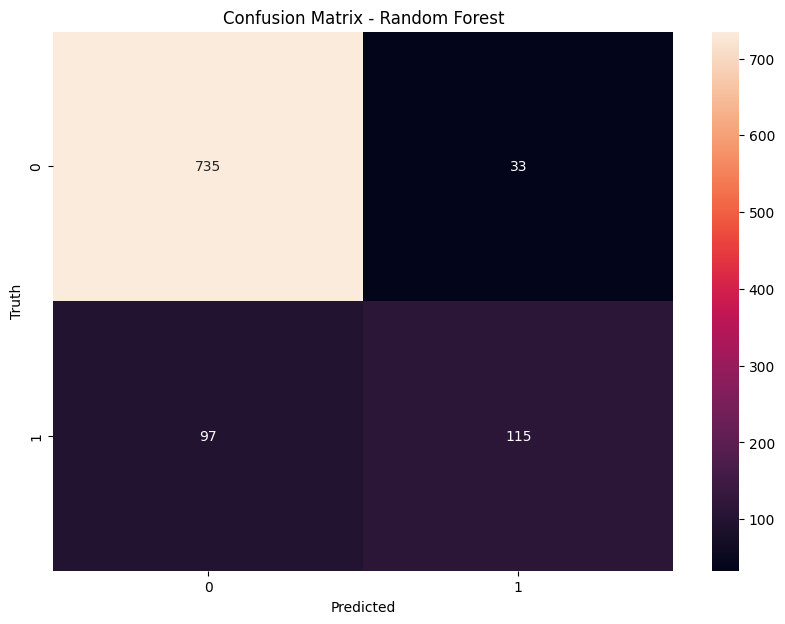


Random Forest Evaluation Metrics:
Accuracy: 0.87
Precision: 0.86
Recall: 0.87
F1-score: 0.86


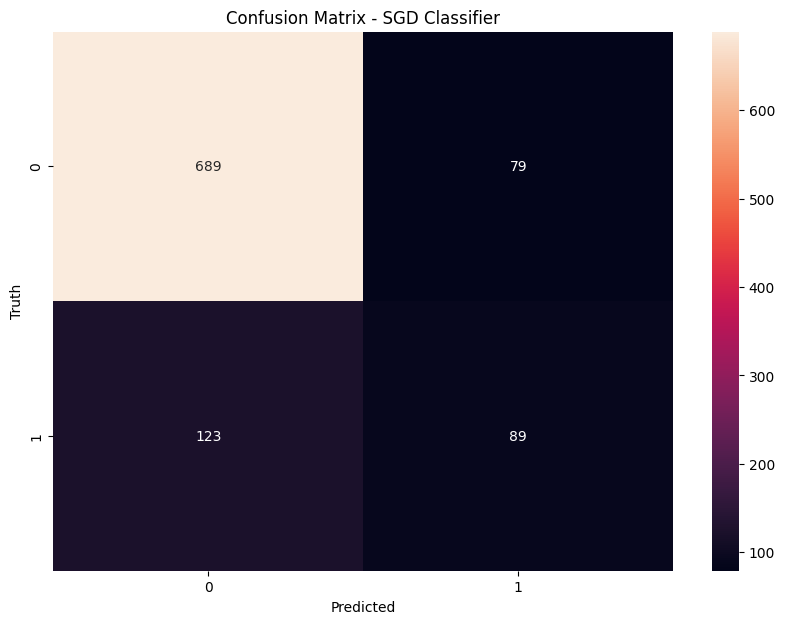


SGD Classifier Evaluation Metrics:
Accuracy: 0.79
Precision: 0.78
Recall: 0.79
F1-score: 0.78


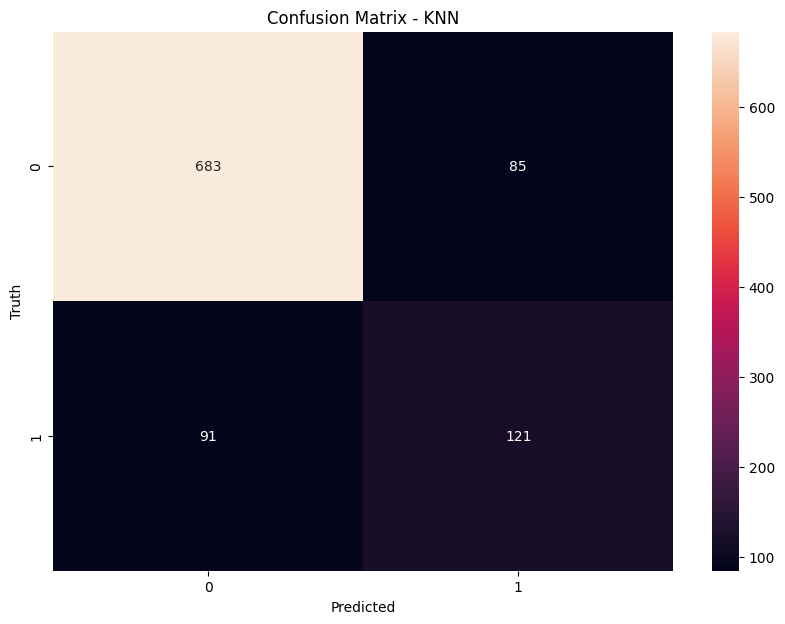


KNN Evaluation Metrics:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.821429   0.803969  0.821429  0.795782
1        Random Forest  0.867347   0.860399  0.867347  0.858209
2       SGD Classifier  0.793878   0.779566  0.793878  0.784814
3                  KNN  0.820408   0.818602  0.820408  0.819469


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define your models here
models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Fit and transform the training data with the preprocessing pipeline
X_train_prepared = preprocessing.fit_transform(X_train)

# Transform the test data with the preprocessing pipeline
X_test_prepared = preprocessing.transform(X_test)

# Evaluate each model
for name, model in models_binary.items():
    # Fit the model
    model.fit(X_train_prepared, y_train_high)
    
    # Predict the target values
    y_pred = model.predict(X_test_prepared)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test_high, y_pred)
    precision = precision_score(y_test_high, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_high, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_high, y_pred, average='weighted', zero_division=0)
    
    # Append metrics to lists
    model_names.append(name)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_high, y_pred)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})


# Display the DataFrame
print(metrics_df)

Random forest has the highest score for all metrics. This indicates random forest is the best model for the binary classification

In [15]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

TEST USING DUMMY TO PROVE ACCURACY IS NOT A GOOD PERFORMANCE MEASUREMENT FOR CLASSIFICATION TASK

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf_high = SGDClassifier(random_state=42)
sgd_clf_high.fit(X_train, y_train_high)

SGDClassifier(random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf_high, X_train, y_train_high, cv=3, scoring="accuracy")

array([0.79019908, 0.77947933, 0.78101072])

note: is cv=3, there is a 3 fold for this dataset and the output "array([0.79019908, 0.77947933, 0.78101072])" tell us the accuracy score for each 3 different fold.

In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf_high = DummyClassifier()
dummy_clf_high.fit(X_train, y_train_high)
print(any(dummy_clf_high.predict(X_train)))

False


False here means that all output is zero value. The "print(any(dummy_clf.predict(X_train)))" will print true if there is any True value in its prediction. In our case 0 value is is the low quality wine as it is below 7. Hence, the dummy predict everything as low quality

In [19]:
cross_val_score(dummy_clf_high, X_train, y_train_high, cv=3, scoring="accuracy")

array([0.78330781, 0.78330781, 0.78407351])

as observed, eventhough the dummy classified everything as false, it can still get accuracy of 78% for all fold, but why is that?

In [20]:

above_or_equal_7 = wine[wine['quality'] >= 7].shape[0]
below_7 = wine[wine['quality'] < 7].shape[0]
only_7 = wine[wine['quality'] == 7].shape[0]
only_6 = wine[wine['quality'] == 6].shape[0] #since 6 has the highest count
total_rows = wine['quality'].shape[0]


print(f"Number of rows with 'quality' 7 and above: {above_or_equal_7}")
print(f"Number of rows with 'quality' less than 7: {below_7}")
print(f"Number of rows with 'quality' is 7: {only_7}")
print(f"Number of rows with 'quality' is 6: {only_6}")
print(f"Total number of rows in 'quality' column: {total_rows}")

Number of rows with 'quality' 7 and above: 1060
Number of rows with 'quality' less than 7: 3838
Number of rows with 'quality' is 7: 880
Number of rows with 'quality' is 6: 2198
Total number of rows in 'quality' column: 4898


note: the class is imbalance

also, as observed the low quality has 3838 rows and the total of rows is 4898. divide this 2 value will get 78%. Hence, that is why the accuracy is high because 78% of all the rows is low quality value

c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


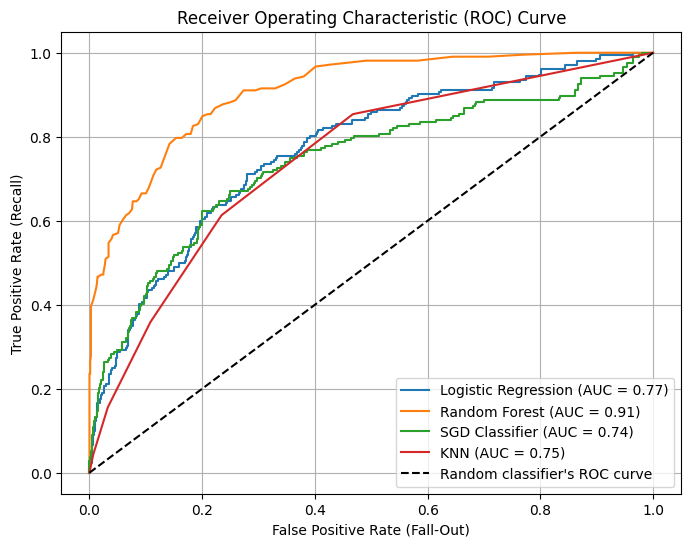

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize a list to store the model objects
models = []

# Fit and store each model
for name, model in models_binary.items():
    model.fit(X_train, y_train_high)
    models.append((name, model))

# Initialize figure
plt.figure(figsize=(8, 6))

# Iterate over each model
for name, model in models:
    # Compute scores
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_high, y_score)
    roc_auc = roc_auc_score(y_test_high, y_score)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random classifier's ROC curve
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")

# Set labels and title
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)

# Add legend
plt.legend(loc="lower right", fontsize=10)

# Show plot
plt.show()


Based on the ROC, Random Forest produce the highest AUC, which is not surprising as random forest perform the best in all metrics for classsification evaluation

it means that random forest can classify and make a clear distinction between positive and false value

MULTICLASS CLASSIFICATION 

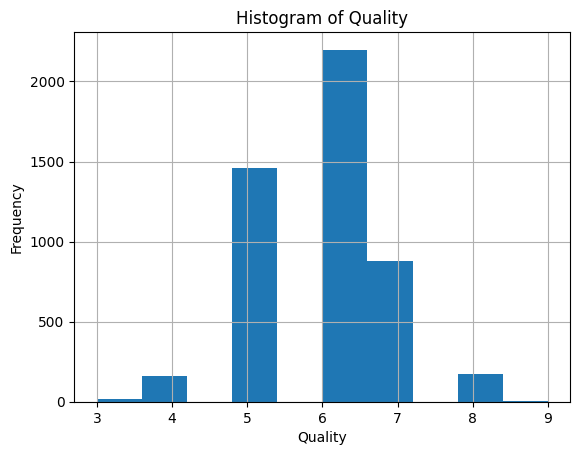

In [22]:
import matplotlib.pyplot as plt

# Plot a histogram for the "quality" column
wine['quality'].hist(bins=10)
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Based on the histogram above, it is observed that only quality 3,4,5,6,7,8 and 9 accordingly that has value, thus only 7 class will exist in the multiclass.

the name of the label will change accordingly in the confusion matrix

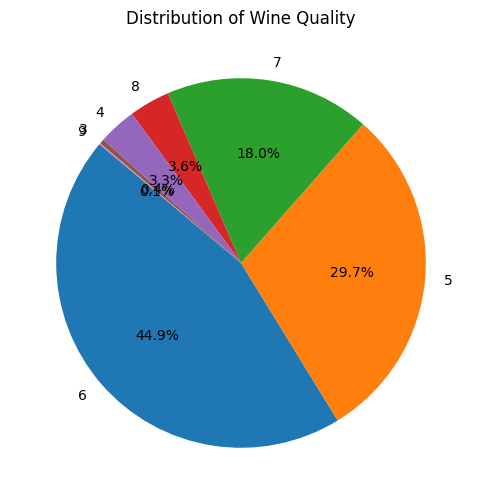

In [38]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value in the 'quality' column
quality_count = wine['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(quality_count, labels=quality_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality')
plt.show()

the class is extremely imbalance

MODEL PERFORMANCE EVAL USING TRAINING SET

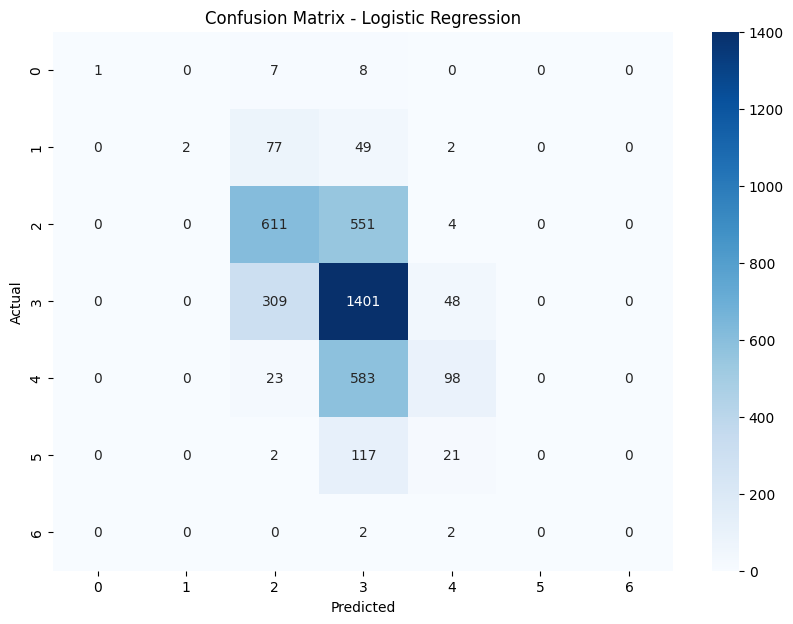


Logistic Regression Evaluation Metrics on Training Set:
Accuracy: 0.54
Precision: 0.55
Recall: 0.54
F1-score: 0.49


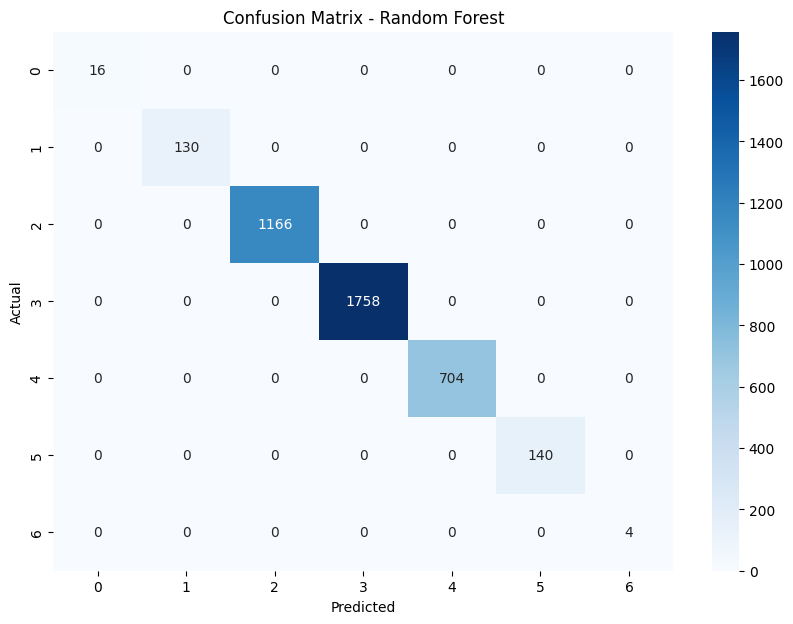


Random Forest Evaluation Metrics on Training Set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


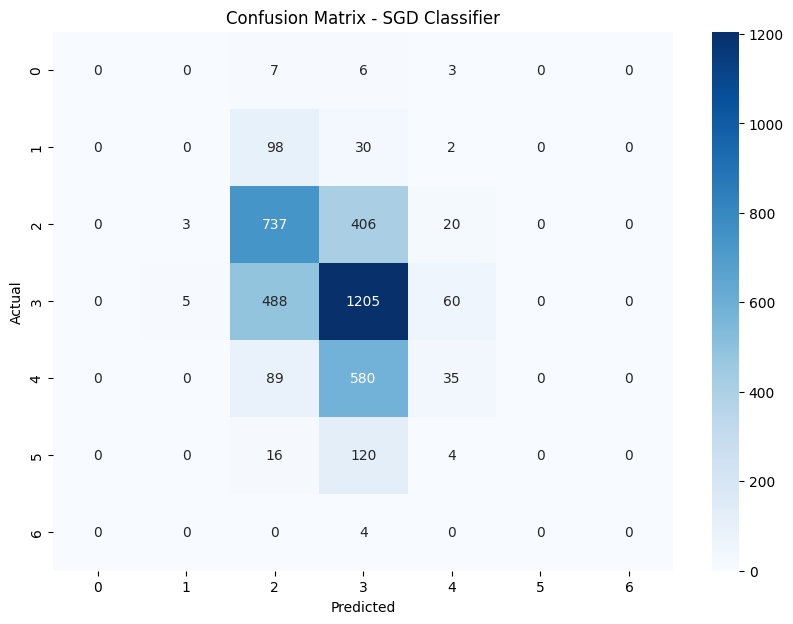


SGD Classifier Evaluation Metrics on Training Set:
Accuracy: 0.50
Precision: 0.43
Recall: 0.50
F1-score: 0.45


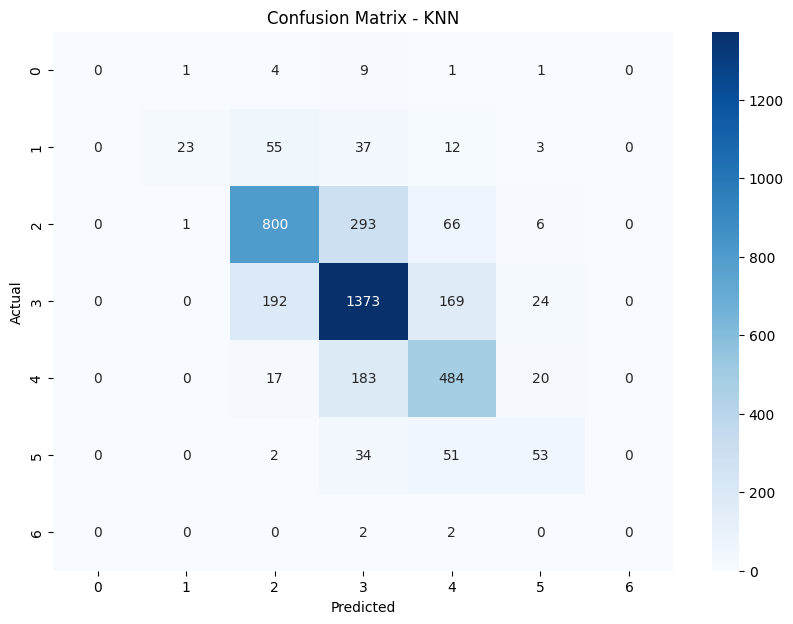


KNN Evaluation Metrics on Training Set:
Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.69
One vs Rest Classifier Metrics:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.539306   0.546476  0.539306  0.488560
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2       SGD Classifier  0.504594   0.433541  0.504594  0.447012
3                  KNN  0.697550   0.700554  0.697550  0.688946


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsRestClassifier(SGDClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsRestClassifier
model_names_ovr = []
accuracies_ovr = []
precisions_ovr = []
recalls_ovr = []
f1_scores_ovr = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values on the training set
    y_pred_train = model.predict(X_train_std)
    
    # Calculate evaluation metrics on the training set
    acc_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall_train = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1_train = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Append evaluation metrics to respective lists
    model_names_ovr.append(name)
    accuracies_ovr.append(acc_train)
    precisions_ovr.append(precision_train)
    recalls_ovr.append(recall_train)
    f1_scores_ovr.append(f1_train)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics on Training Set:")
    print(f"Accuracy: {acc_train:.2f}")
    print(f"Precision: {precision_train:.2f}")
    print(f"Recall: {recall_train:.2f}")
    print(f"F1-score: {f1_train:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsRestClassifier
metrics_df_ovr = pd.DataFrame({
    'Model': model_names_ovr,
    'Accuracy': accuracies_ovr,
    'Precision': precisions_ovr,
    'Recall': recalls_ovr,
    'F1-score': f1_scores_ovr
})

# Display the DataFrame for OneVsRestClassifier
print("One vs Rest Classifier Metrics:")
print(metrics_df_ovr)


MODEL PERFORMANCE EVALUATION USING TEST SET

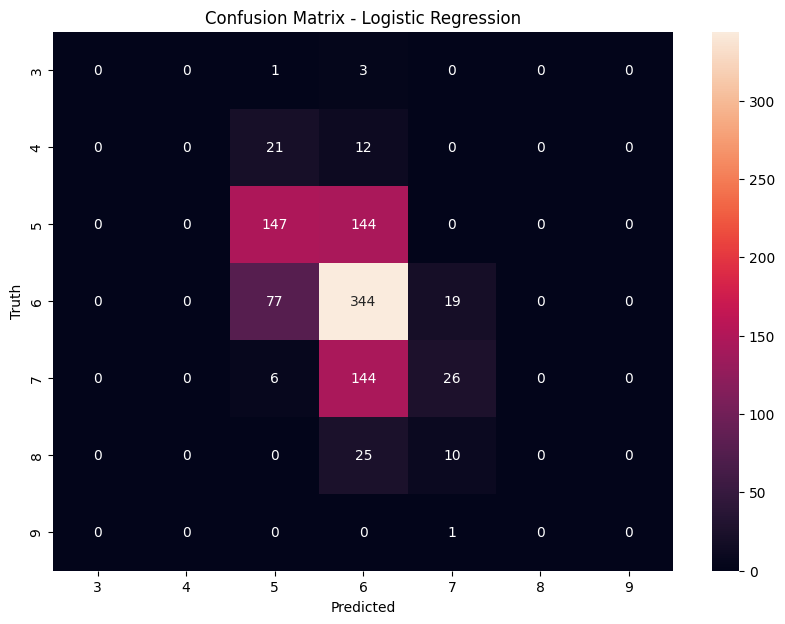


Logistic Regression Evaluation Metrics:
Accuracy: 0.53
Precision: 0.49
Recall: 0.53
F1-score: 0.48


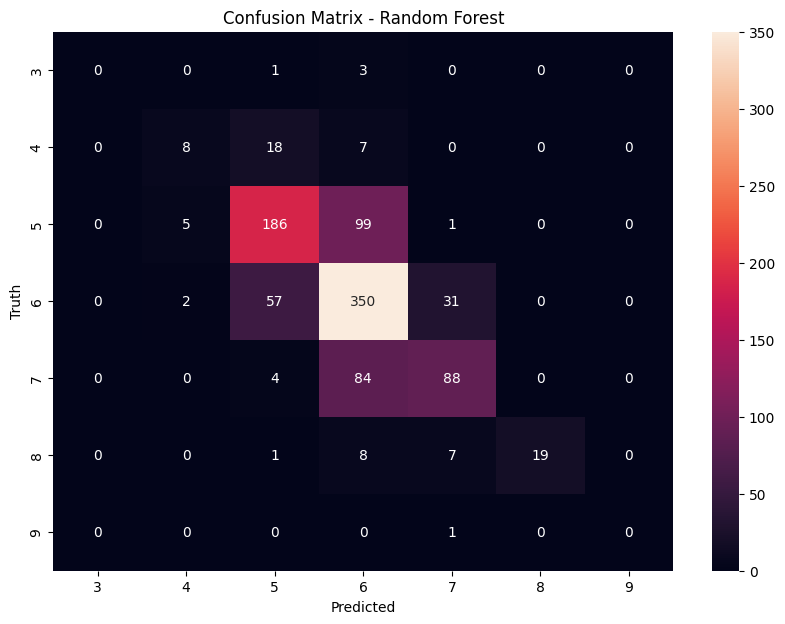


Random Forest Evaluation Metrics:
Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1-score: 0.66


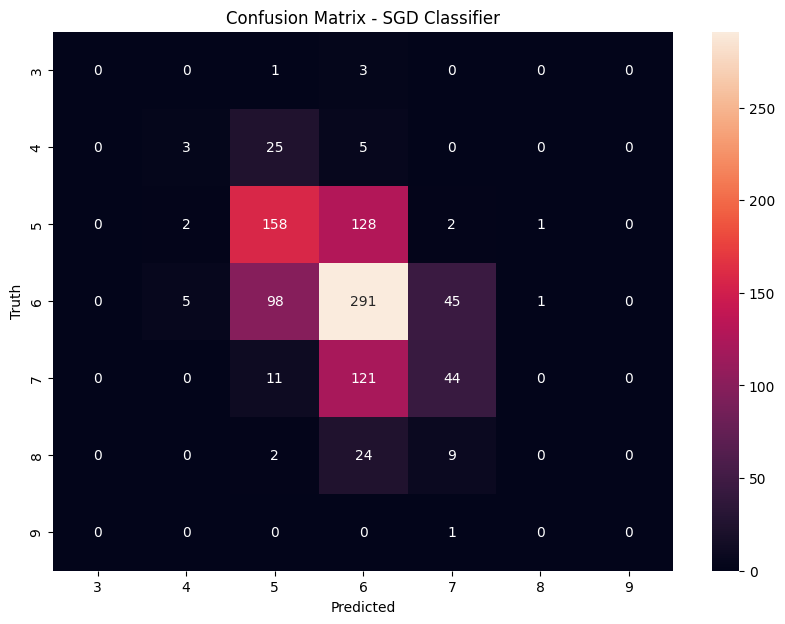


SGD Classifier Evaluation Metrics:
Accuracy: 0.51
Precision: 0.48
Recall: 0.51
F1-score: 0.48


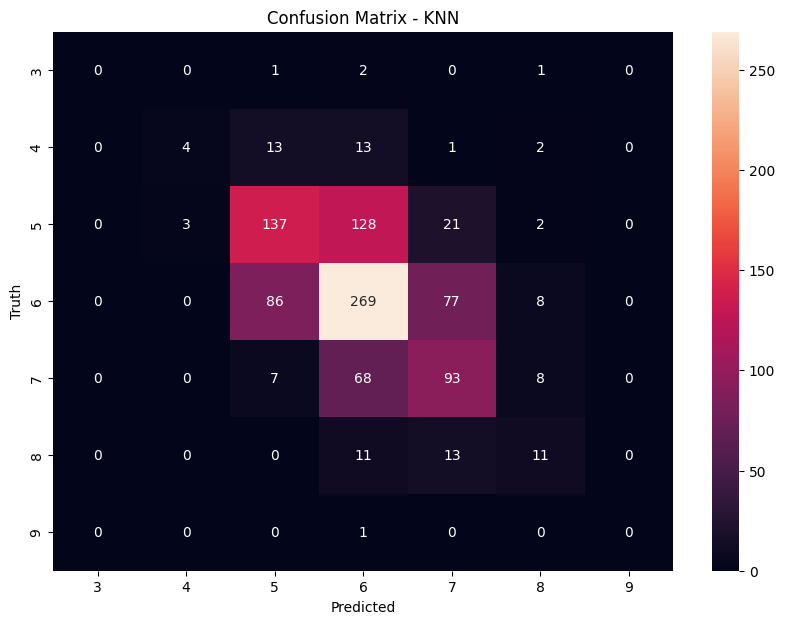


KNN Evaluation Metrics:
Accuracy: 0.52
Precision: 0.53
Recall: 0.52
F1-score: 0.52
One vs Rest Classifier Metrics:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.527551   0.486431  0.527551  0.478813
1        Random Forest  0.664286   0.669195  0.664286  0.655430
2       SGD Classifier  0.506122   0.475793  0.506122  0.480085
3                  KNN  0.524490   0.525195  0.524490  0.517388


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)
# Transform the test data with the preprocessing pipeline
X_test_std = preprocessing_pipeline.transform(X_test)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsRestClassifier(SGDClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsRestClassifier
model_names_ovr = []
accuracies_ovr = []
precisions_ovr = []
recalls_ovr = []
f1_scores_ovr = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append evaluation metrics to respective lists
    model_names_ovr.append(name)
    accuracies_ovr.append(acc)
    precisions_ovr.append(precision)
    recalls_ovr.append(recall)
    f1_scores_ovr.append(f1)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsRestClassifier
metrics_df_ovr = pd.DataFrame({
    'Model': model_names_ovr,
    'Accuracy': accuracies_ovr,
    'Precision': precisions_ovr,
    'Recall': recalls_ovr,
    'F1-score': f1_scores_ovr
})

# Display the DataFrame for OneVsRestClassifier
print("One vs Rest Classifier Metrics:")
print(metrics_df_ovr)


similarly like binary, random forest give the highest score for all metrics in classification performance test

based on the confusion matrix, it seems like all the model consistently give value 6,5 and 7 the highest score. This can be explained by histogram below as 6,5 and 7 is the top 3 highest frequency in the dataset, hence the model can predict it the most

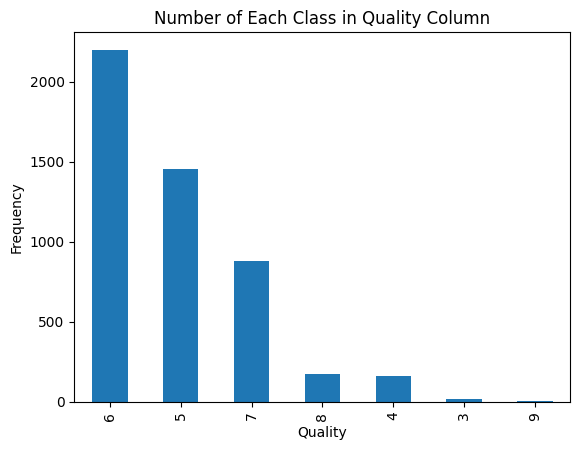


Number of each class in 'quality' column:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [25]:
import matplotlib.pyplot as plt

# Get the counts of each unique value in the 'quality' column
quality_counts = wine['quality'].value_counts()

# Plot a bar graph for the counts
quality_counts.plot(kind='bar')
plt.title('Number of Each Class in Quality Column')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Print the exact value of each class
print("\nNumber of each class in 'quality' column:")
print(quality_counts)

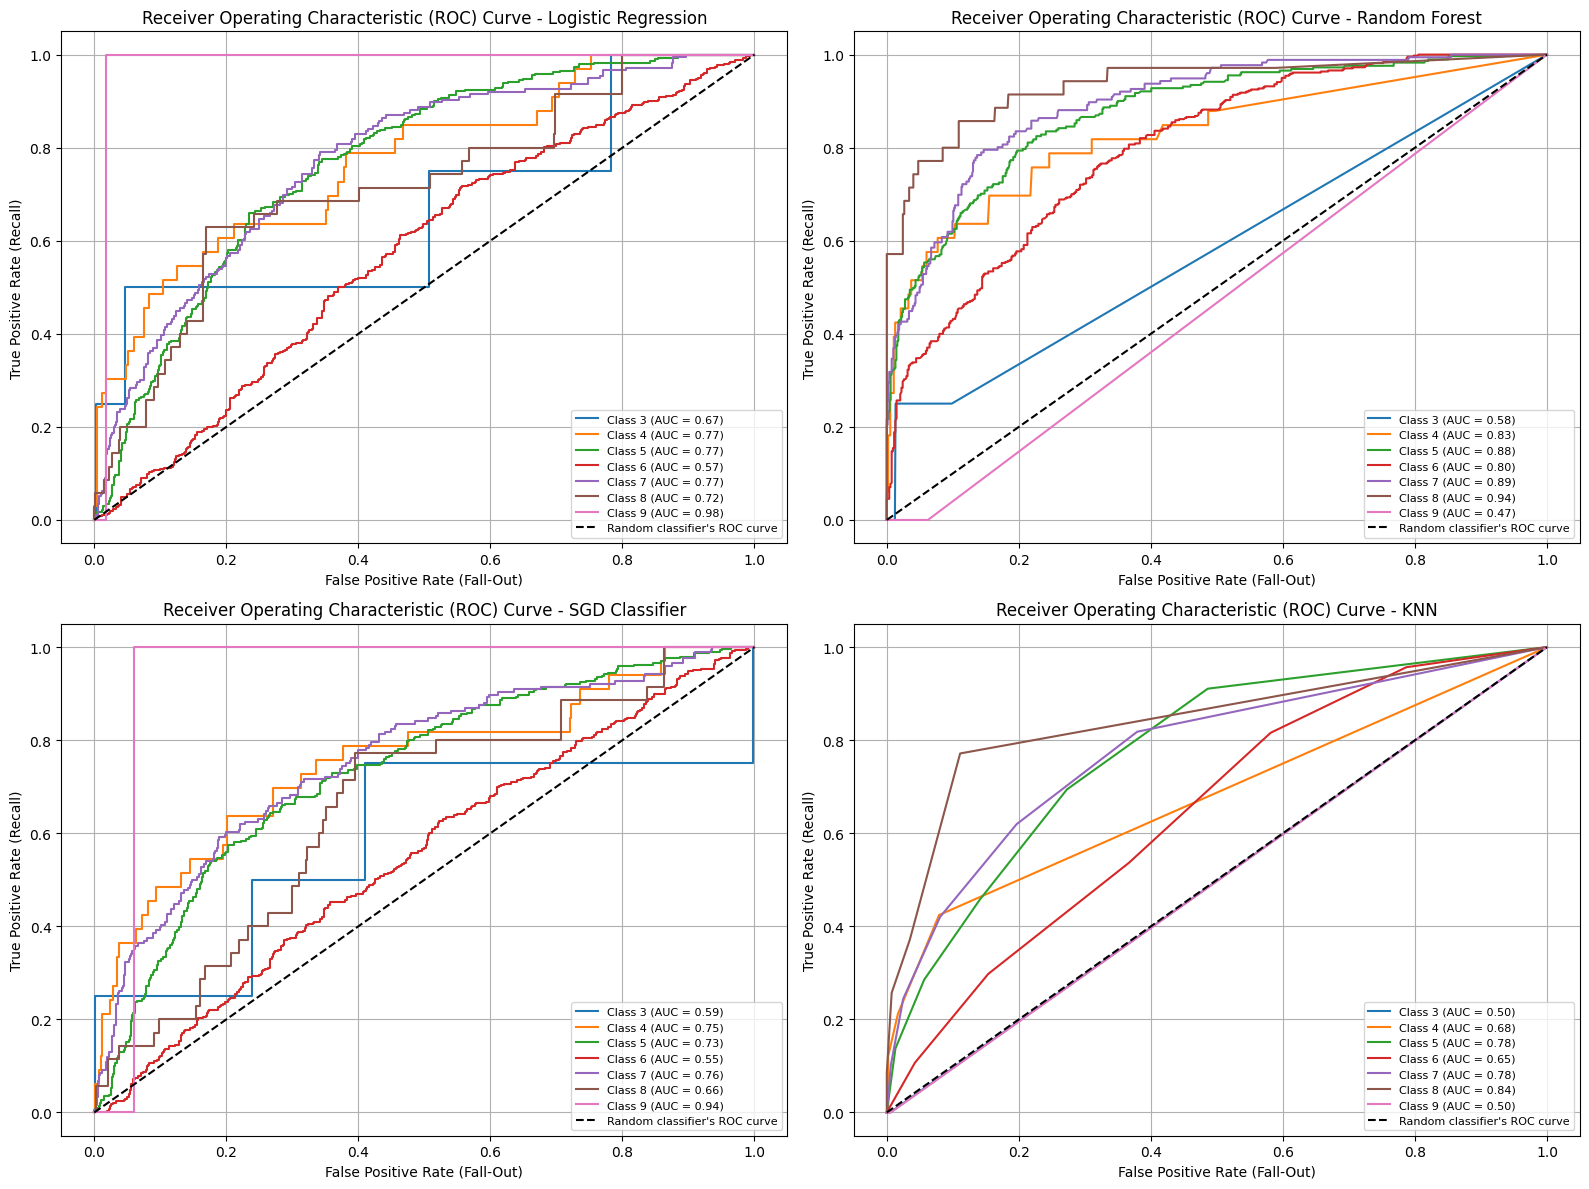

In [26]:
# Define unique classes from y_test
classes = np.unique(y_test)

# Create subplots for each model
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Iterate over each model
for idx, (name, model) in enumerate(models_multi.items()):
    # Compute scores
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_std)
    else:
        y_score = model.predict_proba(X_test_std)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test == classes[i], y_score[:, i])
    
        # Plot ROC curve for each class in a separate subplot
        axs[idx // 2, idx % 2].plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', linestyle='-')

    # Plot random classifier's ROC curve in each subplot
    axs[idx // 2, idx % 2].plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")

    # Set labels and title for each subplot
    axs[idx // 2, idx % 2].set_xlabel('False Positive Rate (Fall-Out)')
    axs[idx // 2, idx % 2].set_ylabel('True Positive Rate (Recall)')
    axs[idx // 2, idx % 2].set_title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    axs[idx // 2, idx % 2].grid(True)

    # Add legend for each subplot
    axs[idx // 2, idx % 2].legend(loc="lower right", fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


for SGD, Logistic Regression and random forest, class 9 has the highest AUC.This could happen because class 9 has the smallest sample

ONE VS ONE CLASSIFIER

PERFORMANCE EVALUATION USING TRAINING SET ONLY

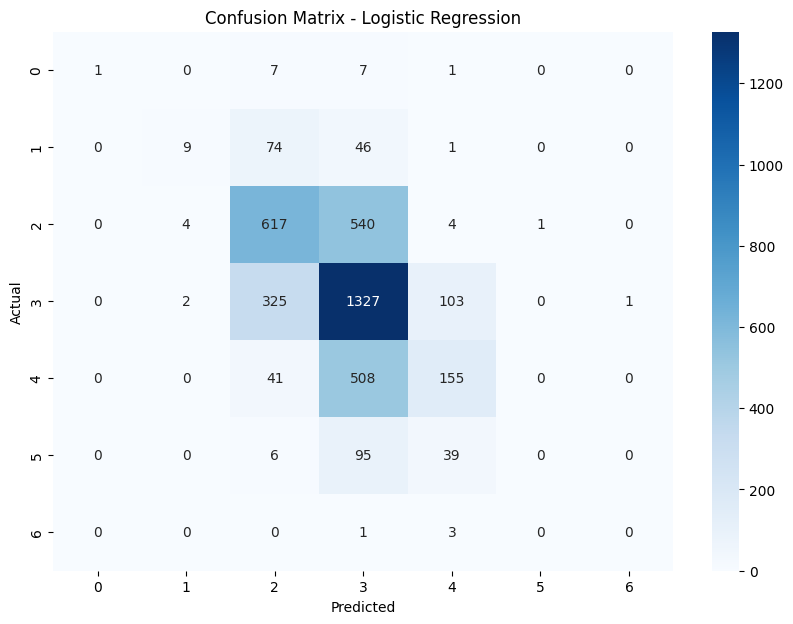


Logistic Regression Evaluation Metrics on Training Set:
Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1-score: 0.50


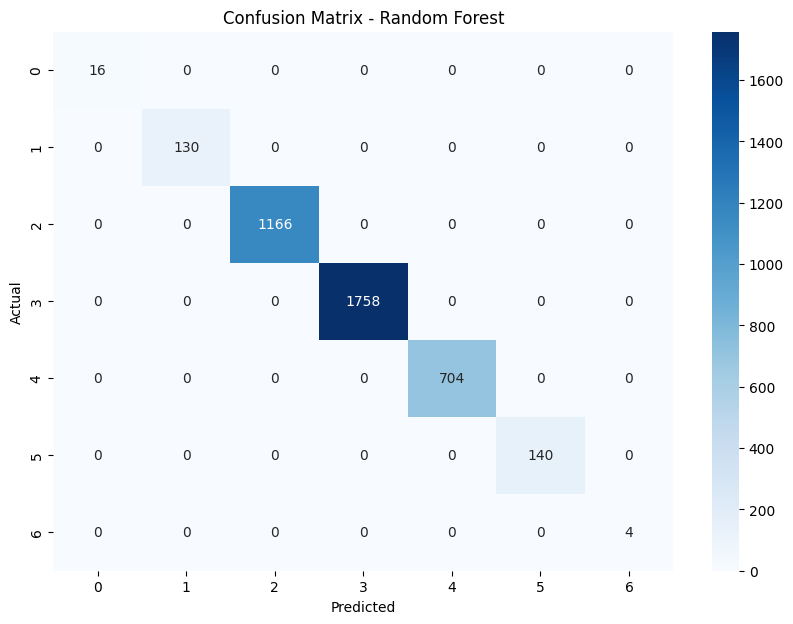


Random Forest Evaluation Metrics on Training Set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


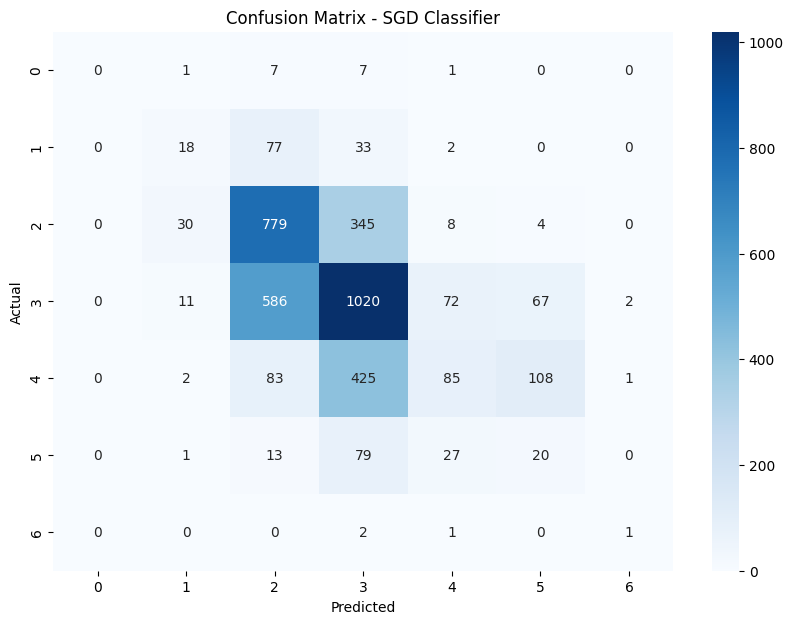


SGD Classifier Evaluation Metrics on Training Set:
Accuracy: 0.49
Precision: 0.48
Recall: 0.49
F1-score: 0.47


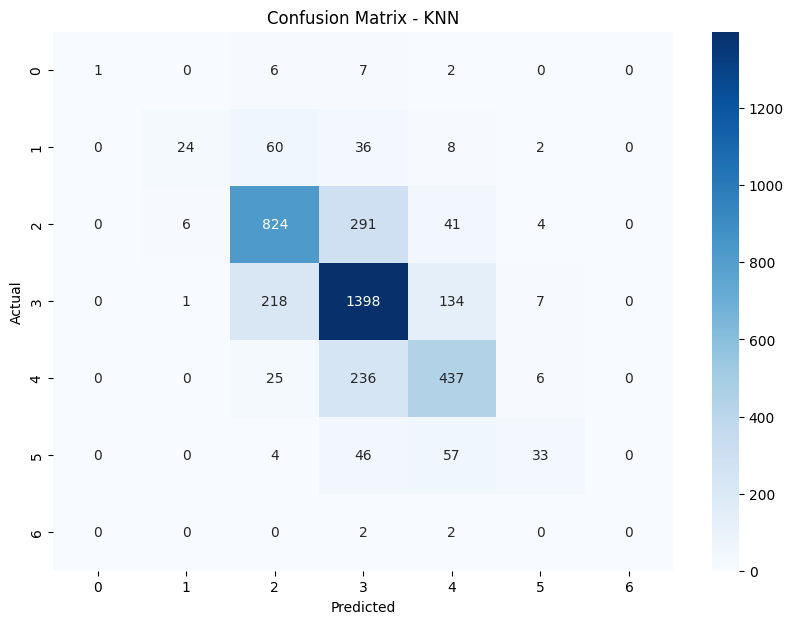


KNN Evaluation Metrics on Training Set:
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1-score: 0.68

One vs One Classifier Metrics on Training Set:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.538285   0.522520  0.538285  0.502094
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2       SGD Classifier  0.490812   0.480797  0.490812  0.465111
3                  KNN  0.693466   0.694578  0.693466  0.681426


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsOneClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsOneClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsOneClassifier(SGDClassifier()),
    "KNN": OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsOneClassifier
model_names_ovo = []
accuracies_ovo = []
precisions_ovo = []
recalls_ovo = []
f1_scores_ovo = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values on the training set
    y_pred_train = model.predict(X_train_std)
    
    # Calculate evaluation metrics on the training set
    acc_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall_train = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1_train = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Append evaluation metrics to respective lists
    model_names_ovo.append(name)
    accuracies_ovo.append(acc_train)
    precisions_ovo.append(precision_train)
    recalls_ovo.append(recall_train)
    f1_scores_ovo.append(f1_train)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics on Training Set:")
    print(f"Accuracy: {acc_train:.2f}")
    print(f"Precision: {precision_train:.2f}")
    print(f"Recall: {recall_train:.2f}")
    print(f"F1-score: {f1_train:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsOneClassifier on training set
metrics_df_ovo = pd.DataFrame({
    'Model': model_names_ovo,
    'Accuracy': accuracies_ovo,
    'Precision': precisions_ovo,
    'Recall': recalls_ovo,
    'F1-score': f1_scores_ovo
})

# Display the DataFrame for OneVsOneClassifier on training set
print("\nOne vs One Classifier Metrics on Training Set:")
print(metrics_df_ovo)


PERFORMANCE EVALUATION USING TEST SET

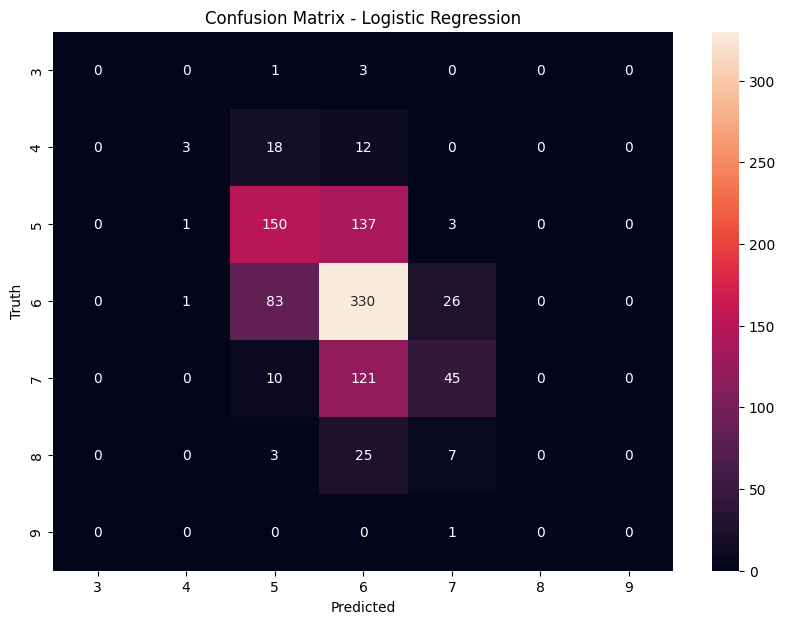


Logistic Regression Evaluation Metrics:
Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1-score: 0.51


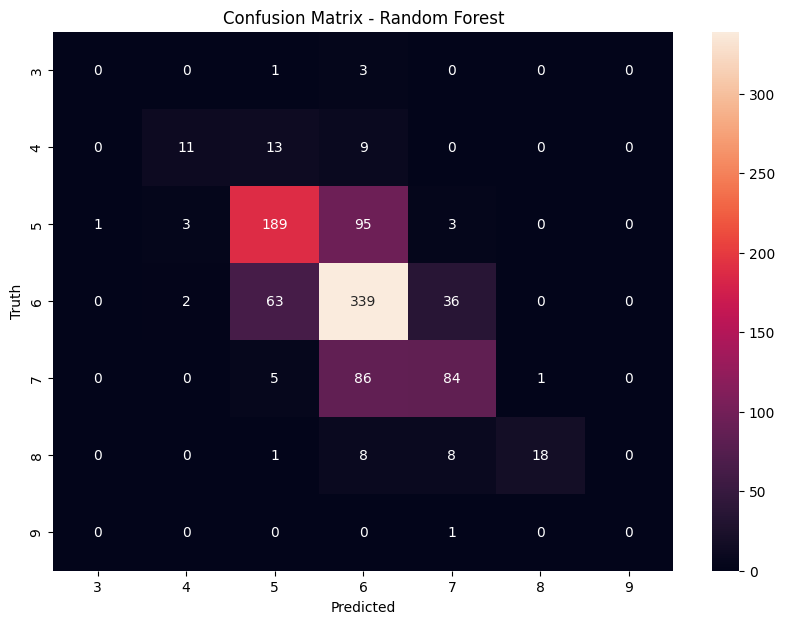


Random Forest Evaluation Metrics:
Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1-score: 0.65


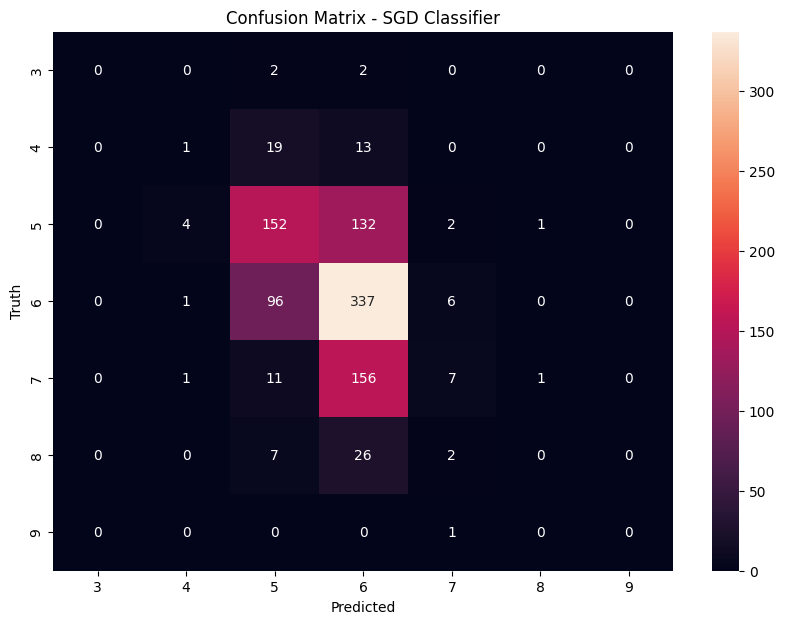


SGD Classifier Evaluation Metrics:
Accuracy: 0.51
Precision: 0.46
Recall: 0.51
F1-score: 0.44


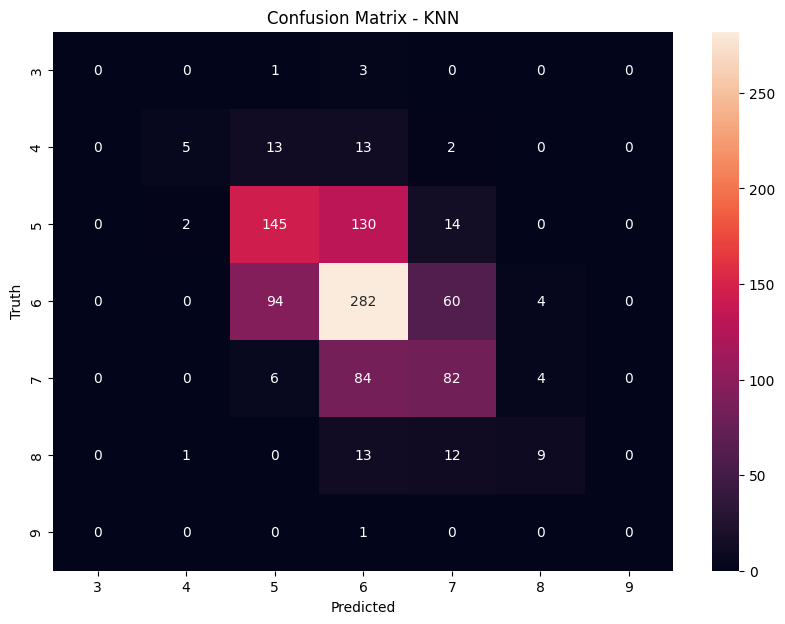


KNN Evaluation Metrics:
Accuracy: 0.53
Precision: 0.53
Recall: 0.53
F1-score: 0.52

One vs One Classifier Metrics:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.538776   0.522768  0.538776  0.505643
1        Random Forest  0.654082   0.659459  0.654082  0.646874
2       SGD Classifier  0.507143   0.459102  0.507143  0.444429
3                  KNN  0.533673   0.533528  0.533673  0.524405


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)
# Transform the test data with the preprocessing pipeline
X_test_std = preprocessing_pipeline.transform(X_test)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsOneClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsOneClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsOneClassifier(SGDClassifier()),
    "KNN": OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsOneClassifier
model_names_ovo = []
accuracies_ovo = []
precisions_ovo = []
recalls_ovo = []
f1_scores_ovo = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append evaluation metrics to respective lists
    model_names_ovo.append(name)
    accuracies_ovo.append(acc)
    precisions_ovo.append(precision)
    recalls_ovo.append(recall)
    f1_scores_ovo.append(f1)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsOneClassifier
metrics_df_ovo = pd.DataFrame({
    'Model': model_names_ovo,
    'Accuracy': accuracies_ovo,
    'Precision': precisions_ovo,
    'Recall': recalls_ovo,
    'F1-score': f1_scores_ovo
})

# Display the DataFrame for OneVsOneClassifier
print("\nOne vs One Classifier Metrics:")
print(metrics_df_ovo)


same issue, 6,5 and 7 has the highest value due to the imbalance

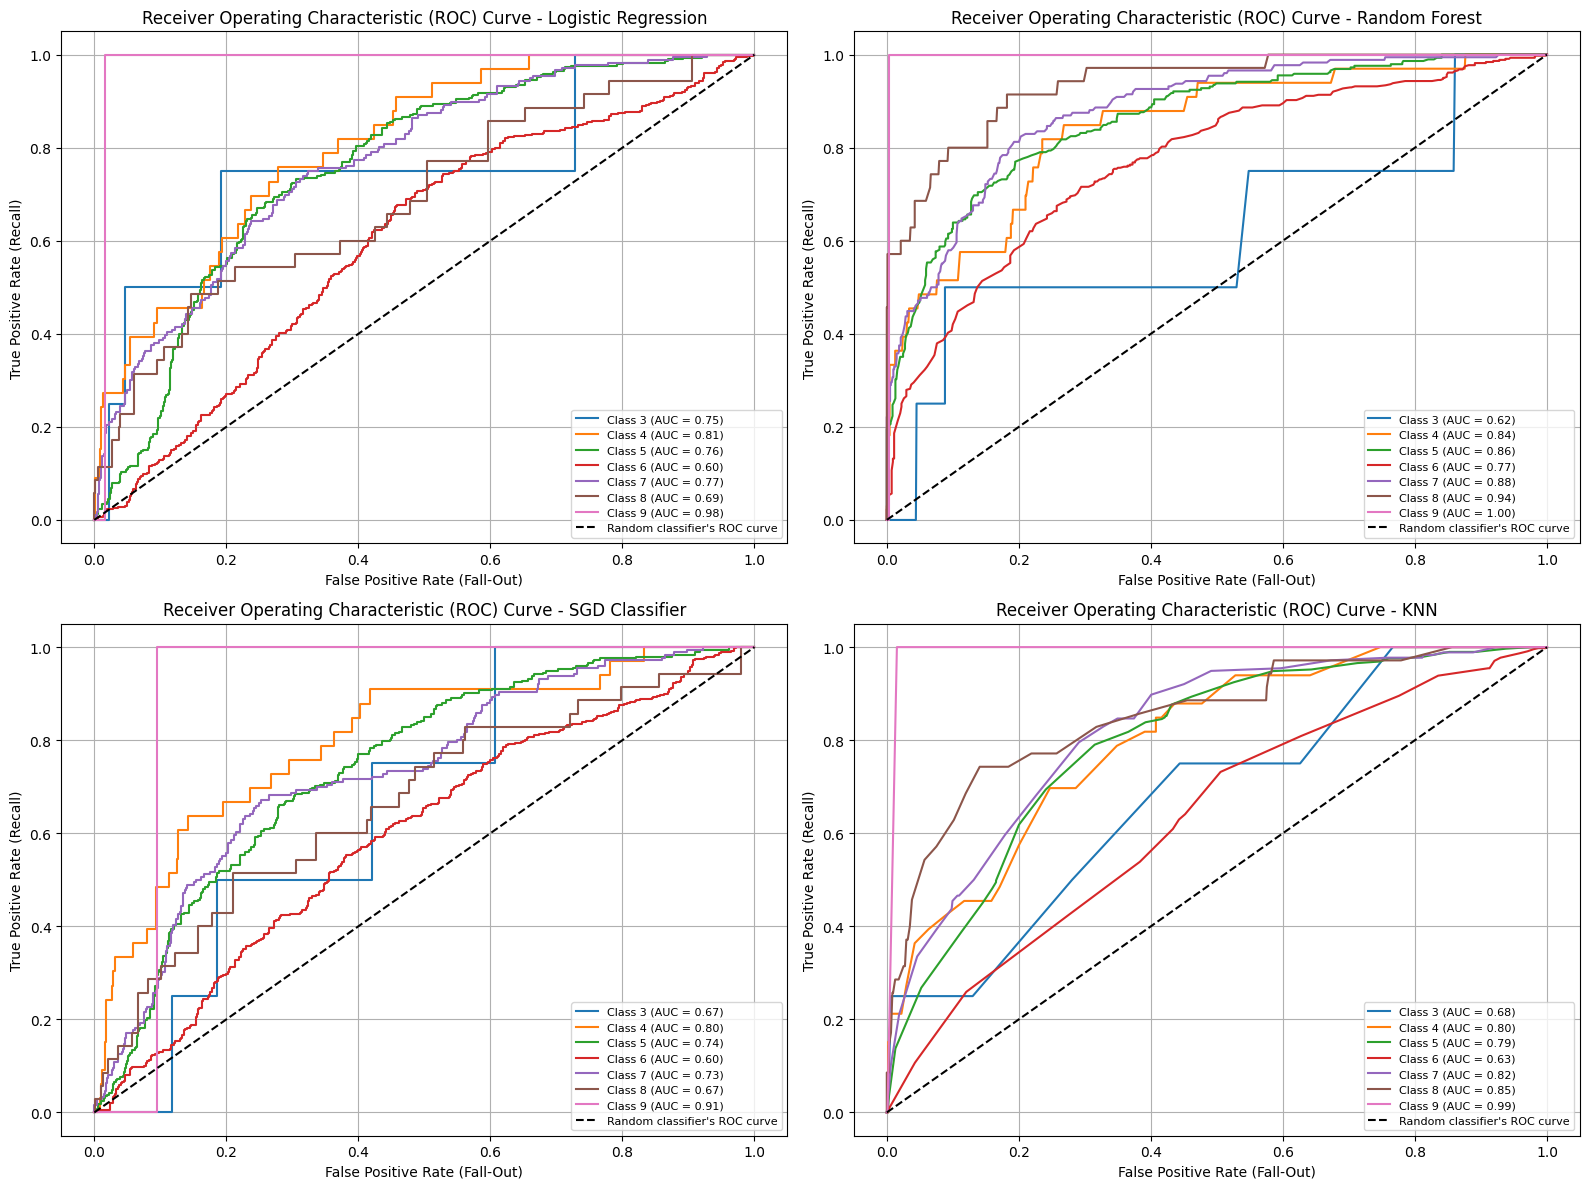

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)
# Transform the test data with the preprocessing pipeline
X_test_std = preprocessing_pipeline.transform(X_test)

# Create subplots for each model
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Iterate over each model
for idx, (name, model) in enumerate(models_multi.items()):
    # Compute scores
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_std)
    else:
        y_score = model.predict_proba(X_test_std)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test == classes[i], y_score[:, i])
    
        # Plot ROC curve for each class in a separate subplot
        axs[idx // 2, idx % 2].plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', linestyle='-')

    # Plot random classifier's ROC curve in each subplot
    axs[idx // 2, idx % 2].plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")

    # Set labels and title for each subplot
    axs[idx // 2, idx % 2].set_xlabel('False Positive Rate (Fall-Out)')
    axs[idx // 2, idx % 2].set_ylabel('True Positive Rate (Recall)')
    axs[idx // 2, idx % 2].set_title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    axs[idx // 2, idx % 2].grid(True)

    # Add legend for each subplot
    axs[idx // 2, idx % 2].legend(loc="lower right", fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


EXPERIMENT: REMOVE ROWS WITH VALUE 3 AND 9

Since number 3 and 9 class has very low sample, lets try to drop the column to see whether the multi class classification will improve or not

In [30]:
# Get the counts of each unique value in the 'quality' column
quality_counts = wine['quality'].value_counts()

# Print the exact value of each class
print("\nNumber of each class in 'quality' column:")
print(quality_counts)


Number of each class in 'quality' column:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [31]:
wine_reduced = wine[~wine['quality'].isin([3, 9])]

In [32]:
wine_reduced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
from sklearn.model_selection import train_test_split

# Split the reduced data into features (X) and target (y)
X_reduced = wine_reduced.drop('quality', axis=1)
y_reduced = wine_reduced['quality']

# Perform a stratified split on the reduced data
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, stratify=y_reduced, random_state=42)

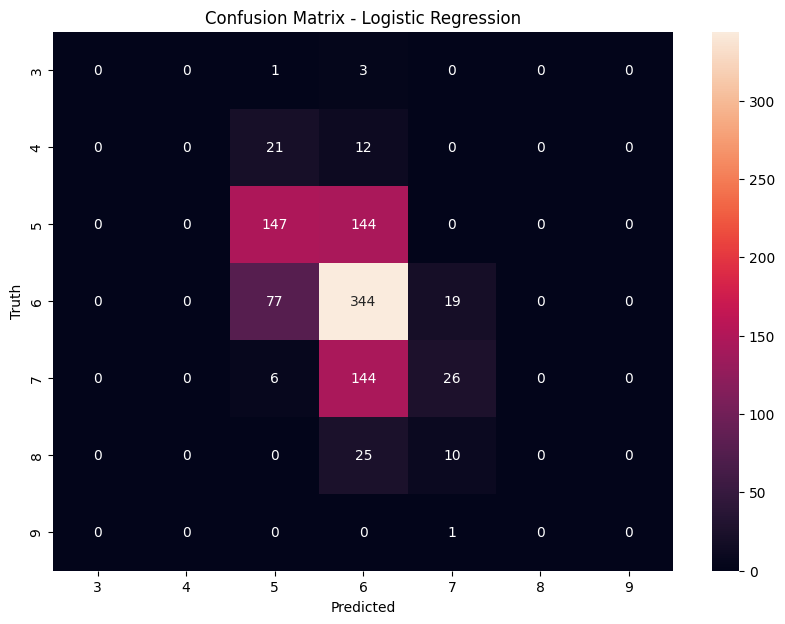


Logistic Regression Evaluation Metrics:
Accuracy: 0.53
Precision: 0.49
Recall: 0.53
F1-score: 0.48


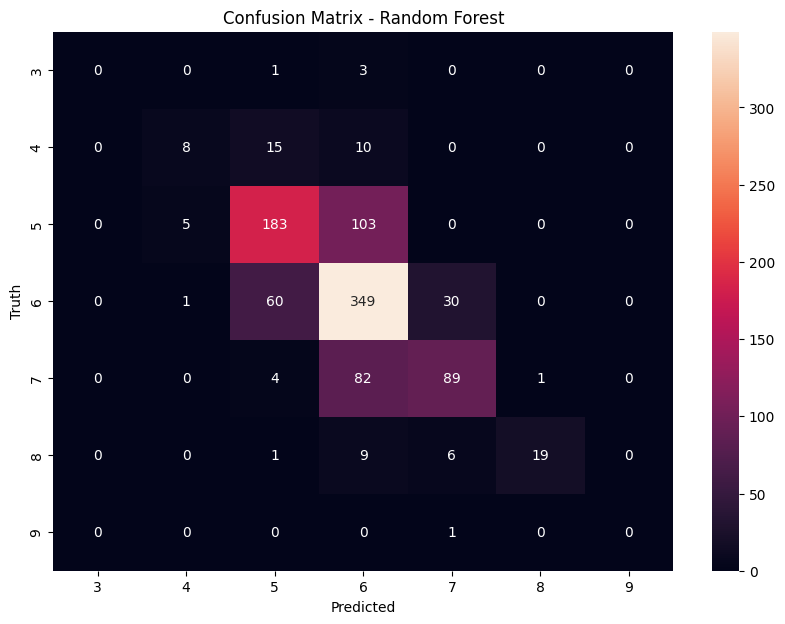


Random Forest Evaluation Metrics:
Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1-score: 0.65


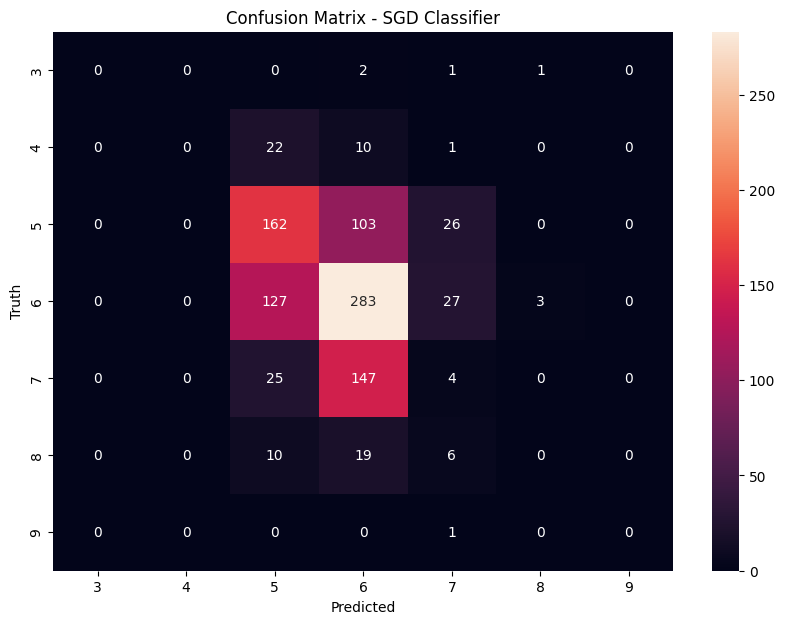


SGD Classifier Evaluation Metrics:
Accuracy: 0.46
Precision: 0.38
Recall: 0.46
F1-score: 0.41


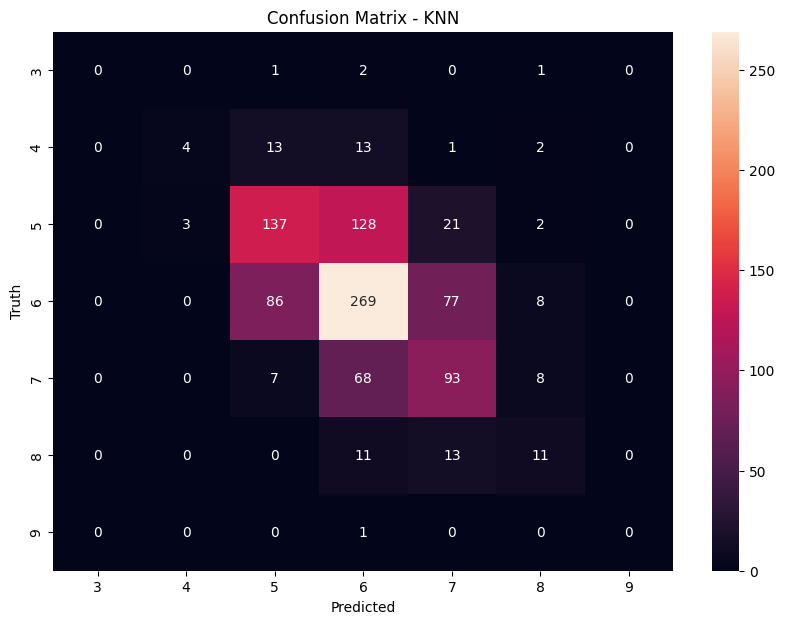


KNN Evaluation Metrics:
Accuracy: 0.52
Precision: 0.53
Recall: 0.52
F1-score: 0.52
One vs Rest Classifier Metrics:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.527551   0.486431  0.527551  0.478813
1        Random Forest  0.661224   0.667681  0.661224  0.652456
2       SGD Classifier  0.458163   0.375199  0.458163  0.410080
3                  KNN  0.524490   0.525195  0.524490  0.517388


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train)
# Transform the test data with the preprocessing pipeline
X_test_std = preprocessing_pipeline.transform(X_test)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsRestClassifier(SGDClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsRestClassifier
model_names_ovr = []
accuracies_ovr = []
precisions_ovr = []
recalls_ovr = []
f1_scores_ovr = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append evaluation metrics to respective lists
    model_names_ovr.append(name)
    accuracies_ovr.append(acc)
    precisions_ovr.append(precision)
    recalls_ovr.append(recall)
    f1_scores_ovr.append(f1)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsRestClassifier
metrics_df_ovr = pd.DataFrame({
    'Model': model_names_ovr,
    'Accuracy': accuracies_ovr,
    'Precision': precisions_ovr,
    'Recall': recalls_ovr,
    'F1-score': f1_scores_ovr
})

# Display the DataFrame for OneVsRestClassifier
print("One vs Rest Classifier Metrics:")
print(metrics_df_ovr)


Hypothesis is proven wrong as even with no class 9 and 3, the performance is still similar with the one with 3 and 9

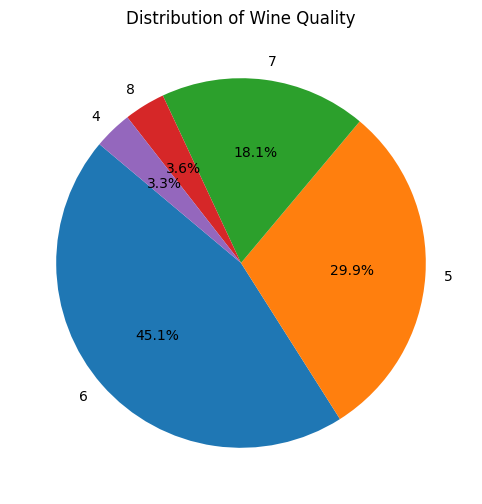

In [37]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value in the 'quality' column
quality_counts = wine_reduced['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality')
plt.show()

even after removing rows with number 9 and 3, we can still see the 4 and 8 is still significantly lower than other. different method need to be applied.

EXPERIMENT 2: OVERSAMPLING METHOD

In [42]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with k_neighbors set to 3
smote = SMOTE(k_neighbors=3)

# Apply SMOTE to the wine dataframe
X_sm, y_sm = smote.fit_resample(wine.drop('quality', axis=1), wine['quality'])

# Convert the oversampled data into a dataframe and add column names
wine_smote = pd.DataFrame(X_sm, columns=wine.columns[:-1])

# Add the 'quality' column to the dataframe
wine_smote['quality'] = y_sm

# Now split the oversampled dataframe into features and target
X_sm = wine_smote.drop('quality', axis=1)
y_sm = wine_smote['quality']

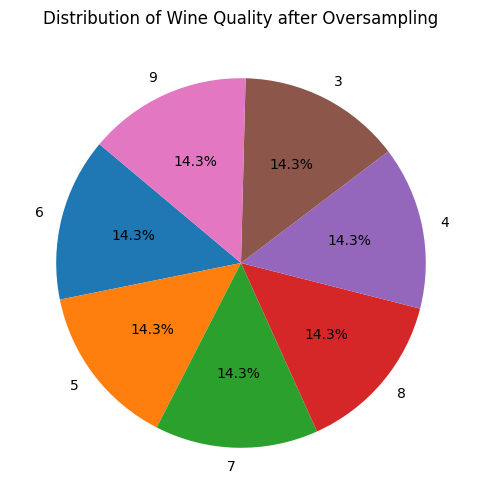

In [44]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value in the 'quality' column
quality_counts_smote = wine_smote['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(quality_counts_smote, labels=quality_counts_smote.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality after Oversampling')
plt.show()

Now the class is balance

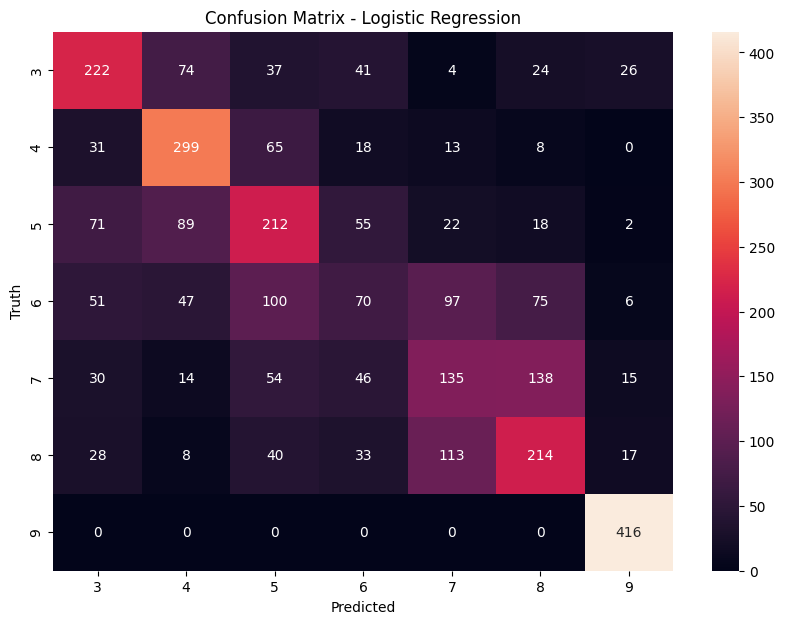


Logistic Regression Evaluation Metrics:
Accuracy: 0.51
Precision: 0.48
Recall: 0.51
F1-score: 0.49


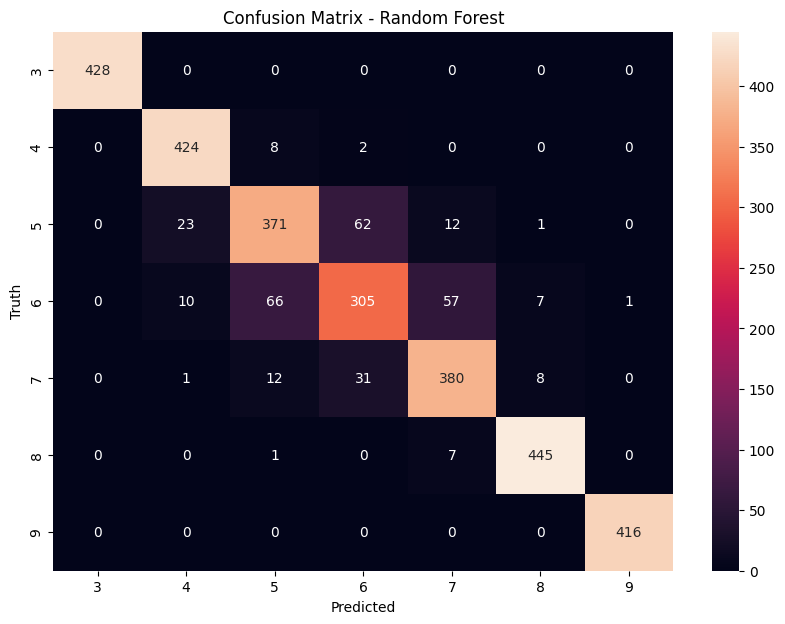


Random Forest Evaluation Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90


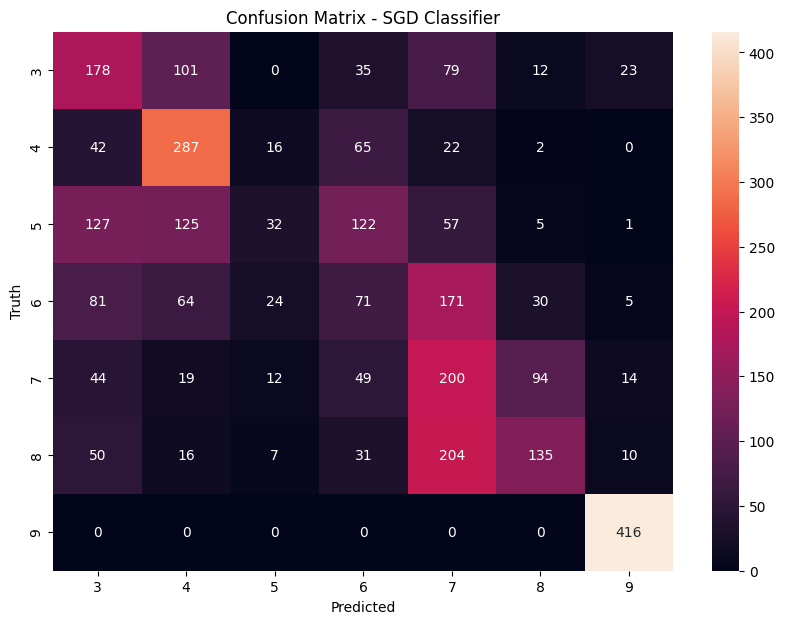


SGD Classifier Evaluation Metrics:
Accuracy: 0.43
Precision: 0.42
Recall: 0.43
F1-score: 0.40


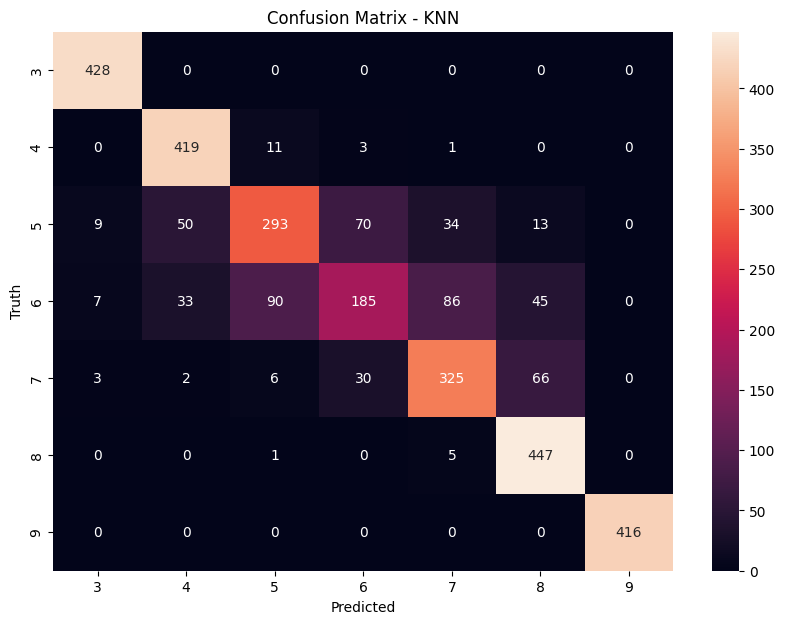


KNN Evaluation Metrics:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1-score: 0.80
One vs Rest Classifier Metrics:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.509422   0.484858  0.509422  0.493211
1        Random Forest  0.899610   0.897351  0.899610  0.897958
2       SGD Classifier  0.428525   0.424345  0.428525  0.401627
3                  KNN  0.816439   0.806279  0.816439  0.804632


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Split the oversampled data into training and testing sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the training data with the preprocessing pipeline
X_train_std = preprocessing_pipeline.fit_transform(X_train_sm)
# Transform the test data with the preprocessing pipeline
X_test_std = preprocessing_pipeline.transform(X_test_sm)

# Define your models here
models_multi = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsRestClassifier(SGDClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics for OneVsRestClassifier
model_names_ovr = []
accuracies_ovr = []
precisions_ovr = []
recalls_ovr = []
f1_scores_ovr = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train_sm)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test_sm, y_pred)
    precision = precision_score(y_test_sm, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test_sm, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test_sm, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test_sm, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append evaluation metrics to respective lists
    model_names_ovr.append(name)
    accuracies_ovr.append(acc)
    precisions_ovr.append(precision)
    recalls_ovr.append(recall)
    f1_scores_ovr.append(f1)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics for OneVsRestClassifier
metrics_df_ovr = pd.DataFrame({
    'Model': model_names_ovr,
    'Accuracy': accuracies_ovr,
    'Precision': precisions_ovr,
    'Recall': recalls_ovr,
    'F1-score': f1_scores_ovr
})

# Display the DataFrame for OneVsRestClassifier
print("One vs Rest Classifier Metrics:")
print(metrics_df_ovr)

After oversampling the dataset (make every class balanced) the random forest and KNN value is greatly improved untill 89% and 80%